In [2]:
!pip install seaborn
!pip install pandas
!pip install numpy

γ = 583.1187, β = 0.48


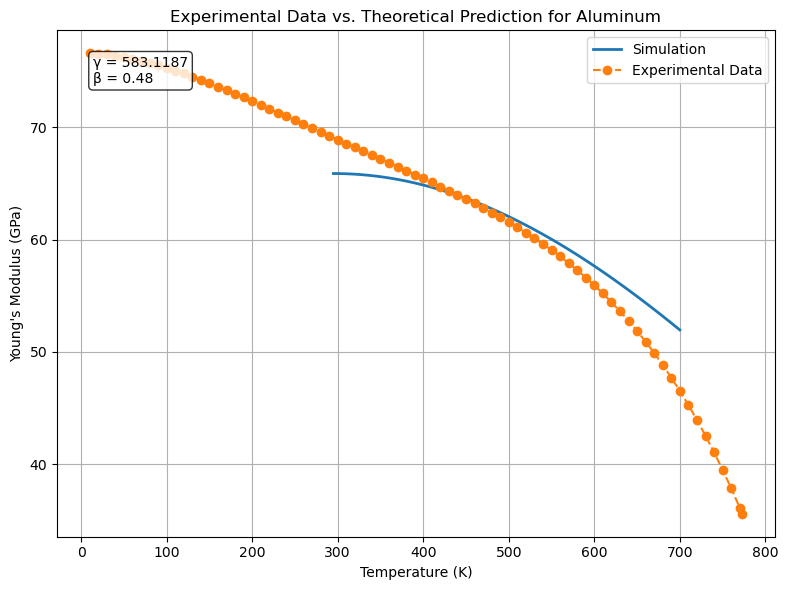

In [4]:
# (C) Reza Rahemi
# Theoretical prediction for Work function as a function of temperature
# Reference: R. Rahemi, Scripta Materialia 99 (2015)
# Calculates gamma in φ(T) = φ(0) - γ * (k_B T)^2 / φ(0) and plots φ(T) for Aluminum

import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

def load_experimental_data(filename: str) -> tuple[np.ndarray, np.ndarray]:
    """Load experimental data from a CSV file in the data directory."""
    file_path = Path("data") / filename
    try:
        data = np.genfromtxt(file_path, delimiter=",")
        return data[:, 0], data[:, 1]
    except FileNotFoundError:
        print(f"Error: File {file_path} not found. Please ensure the file exists in the 'data' directory.")
        return np.array([]), np.array([])
    except Exception as e:
        print(f"Error loading data: {e}")
        return np.array([]), np.array([])

def calculate_work_function(t: np.ndarray, phi_295: float, c: float, t_melt: float) -> tuple[np.ndarray, float]:
    """Calculate work function and gamma for given temperature range."""
    # Universal constants
    e = 1.6e-19  # eV in Joules
    k = 1.38e-23  # Boltzmann constant in J/K
    u = 0.02233  # Guomin Hua's universal constant for metals (GPa/eV^6)
    z = 0.48  # Beta value for Aluminum

    # Material-specific parameters
    x = c * t_melt  # Maximum distance of two atoms (Thermal Coef * melting temp in micro-meter)

    # Calculate dimensionless term
    y = (7 * k * (t - 295)) / (48 * phi_295 * e)

    # Calculate alpha (summation for n=0 to n=1 as per paper)
    s = sum((x + (n - 1) * 2**0.5)**2 / (1 + (n - 1) * 2**0.5)**2 for n in range(1, 3))
    alpha = (36 / x**2) * s

    # Calculate work function
    w = phi_295 - alpha * (y**2) * phi_295
    gamma = alpha * (7.0 / 48.0)**2

    # Young's Modulus in GPa
    m = z * u * w**6

    return m, gamma

def plot_results(t: np.ndarray, m: np.ndarray, tdata: np.ndarray, mdata: np.ndarray, z: float, gamma: float) -> None:
    """Plot simulation and experimental data."""
    plt.style.use('default')  # Use default Matplotlib style
    fig, ax = plt.subplots(figsize=(8, 6))
    
    ax.plot(t, m, label='Simulation', linewidth=2)
    if tdata.size > 0 and mdata.size > 0:  # Only plot experimental data if loaded successfully
        ax.plot(tdata, mdata, label='Experimental Data', marker='o', linestyle='--')
    
    ax.set_xlabel('Temperature (K)')
    ax.set_ylabel("Young's Modulus (GPa)")
    ax.set_title('Experimental Data vs. Theoretical Prediction for Aluminum')
    ax.legend()
    ax.grid(True)
    
    # Add text box with gamma and beta values
    textstr = f'γ = {gamma:.4f}\nβ = {z:.2f}'
    ax.text(0.05, 0.95, textstr, transform=ax.transAxes, fontsize=10,
            verticalalignment='top', bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))
    
    plt.tight_layout()
    plt.show()

def main():
    # Aluminum parameters
    phi_295 = 4.28  # Work function at 295K (eV)
    c = 23.1e-6     # Thermal expansion coefficient (/K)
    t_melt = 933.5  # Melting temperature (K)

    # Load experimental data
    tdata, mdata = load_experimental_data("Al.csv")

    # Generate temperature array
    t = np.linspace(295, 700, 100)  # From room temp to near melting point

    # Calculate work function and Young's modulus
    m, gamma = calculate_work_function(t, phi_295, c, t_melt)

    # Print results
    print(f"γ = {gamma:.4f}, β = 0.48")

    # Plot results
    plot_results(t, m, tdata, mdata, z=0.48, gamma=gamma)

if __name__ == "__main__":
    main()

γ = 583.1187, β = 0.48


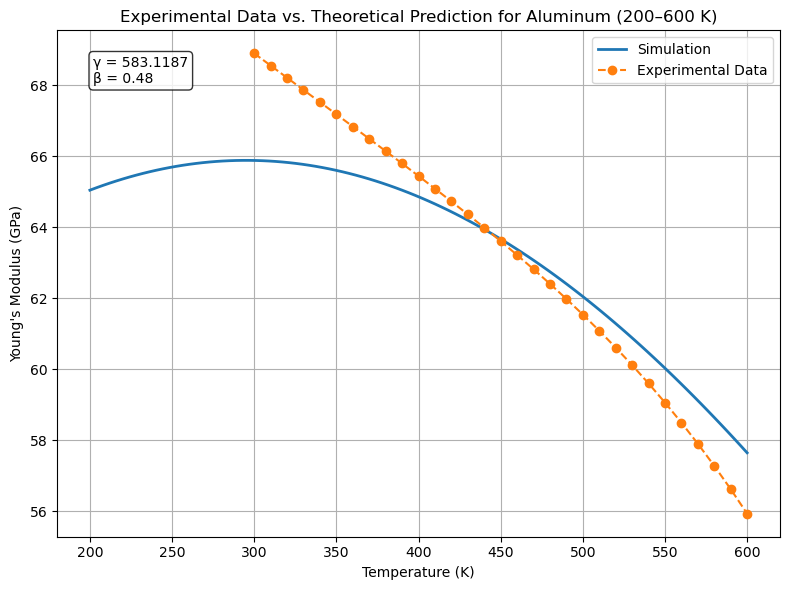

In [22]:
# (C) Reza Rahemi
# Theoretical prediction for Work function as a function of temperature
# Reference: R. Rahemi, Scripta Materialia 99 (2015)
# Calculates gamma in φ(T) = φ(0) - γ * (k_B T)^2 / φ(0) and plots φ(T) for Aluminum

import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

def load_experimental_data(filename: str) -> tuple[np.ndarray, np.ndarray]:
    """Load experimental data from a CSV file and filter for 200–600 K."""
    file_path = Path("data") / filename
    try:
        data = np.genfromtxt(file_path, delimiter=",")
        # Assume data has two columns: temperature (K) and Young's Modulus (GPa)
        temperatures = data[:, 0]
        moduli = data[:, 1]
        # Filter data for 200 K to 600 K
        mask = (temperatures >= 295) & (temperatures <= 600)
        filtered_temps = temperatures[mask]
        filtered_moduli = moduli[mask]
        if filtered_temps.size == 0:
            print("Warning: No data points found in the 200–600 K range.")
        return filtered_temps, filtered_moduli
    except FileNotFoundError:
        print(f"Error: File {file_path} not found. Please ensure the file exists in the 'data' directory.")
        return np.array([]), np.array([])
    except Exception as e:
        print(f"Error loading data: {e}")
        return np.array([]), np.array([])

def calculate_work_function(t: np.ndarray, phi_295: float, c: float, t_melt: float) -> tuple[np.ndarray, float]:
    """Calculate work function and gamma for given temperature range."""
    # Universal constants
    e = 1.6e-19  # eV in Joules
    k = 1.38e-23  # Boltzmann constant in J/K
    u = 0.02233  # Guomin Hua's universal constant for metals (GPa/eV^6)
    z = 0.48  # Beta value for Aluminum

    # Material-specific parameters
    x = c * t_melt  # Maximum distance of two atoms (Thermal Coef * melting temp in micro-meter)

    # Calculate dimensionless term
    y = (7 * k * (t - 295)) / (48 * phi_295 * e)

    # Calculate alpha (summation for n=0 to n=1 as per paper)
    s = sum((x + (n - 1) * 2**0.5)**2 / (1 + (n - 1) * 2**0.5)**2 for n in range(1, 3))
    alpha = (36 / x**2) * s

    # Calculate work function
    w = phi_295 - alpha * (y**2) * phi_295
    gamma = alpha * (7.0 / 48.0)**2

    # Young's Modulus in GPa
    m = z * u * w**6

    return m, gamma

def plot_results(t: np.ndarray, m: np.ndarray, tdata: np.ndarray, mdata: np.ndarray, z: float, gamma: float) -> None:
    """Plot simulation and experimental data."""
    plt.style.use('default')  # Use default Matplotlib style
    fig, ax = plt.subplots(figsize=(8, 6))
    
    ax.plot(t, m, label='Simulation', linewidth=2)
    if tdata.size > 0 and mdata.size > 0:  # Only plot experimental data if loaded successfully
        ax.plot(tdata, mdata, label='Experimental Data', marker='o', linestyle='--')
    
    ax.set_xlabel('Temperature (K)')
    ax.set_ylabel("Young's Modulus (GPa)")
    ax.set_title('Experimental Data vs. Theoretical Prediction for Aluminum (200–600 K)')
    ax.legend()
    ax.grid(True)
    
    # Add text box with gamma and beta values
    textstr = f'γ = {gamma:.4f}\nβ = {z:.2f}'
    ax.text(0.05, 0.95, textstr, transform=ax.transAxes, fontsize=10,
            verticalalignment='top', bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))
    
    plt.tight_layout()
    plt.show()

def main():
    # Aluminum parameters
    phi_295 = 4.28  # Work function at 295K (eV)
    c = 23.1e-6     # Thermal expansion coefficient (/K)
    t_melt = 933.5  # Melting temperature (K)

    # Load experimental data (filtered for 200–600 K)
    tdata, mdata = load_experimental_data("Al.csv")

    # Generate temperature array for 200 ≤ T ≤ 600
    t = np.linspace(200, 600, 100)

    # Calculate work function and Young's modulus
    m, gamma = calculate_work_function(t, phi_295, c, t_melt)

    # Print results
    print(f"γ = {gamma:.4f}, β = 0.48")

    # Plot results
    plot_results(t, m, tdata, mdata, z=0.48, gamma=gamma)

if __name__ == "__main__":
    main()

  0%|          | 0/1000 [00:00<?, ?it/s]/opt/anaconda3/lib/python3.13/site-packages/emcee/moves/red_blue.py:99: RuntimeWarning: invalid value encountered in scalar subtract
  lnpdiff = f + nlp - state.log_prob[j]
100%|██████████| 1000/1000 [00:00<00:00, 2274.96it/s]


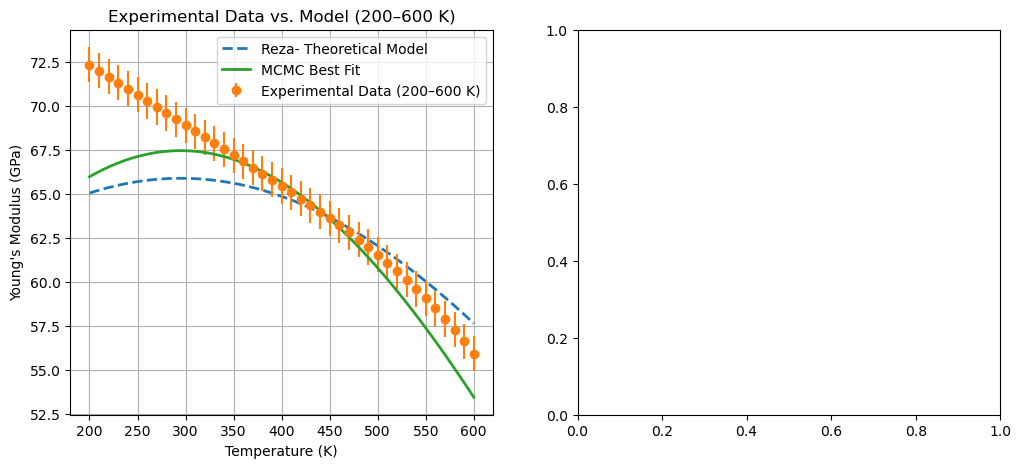

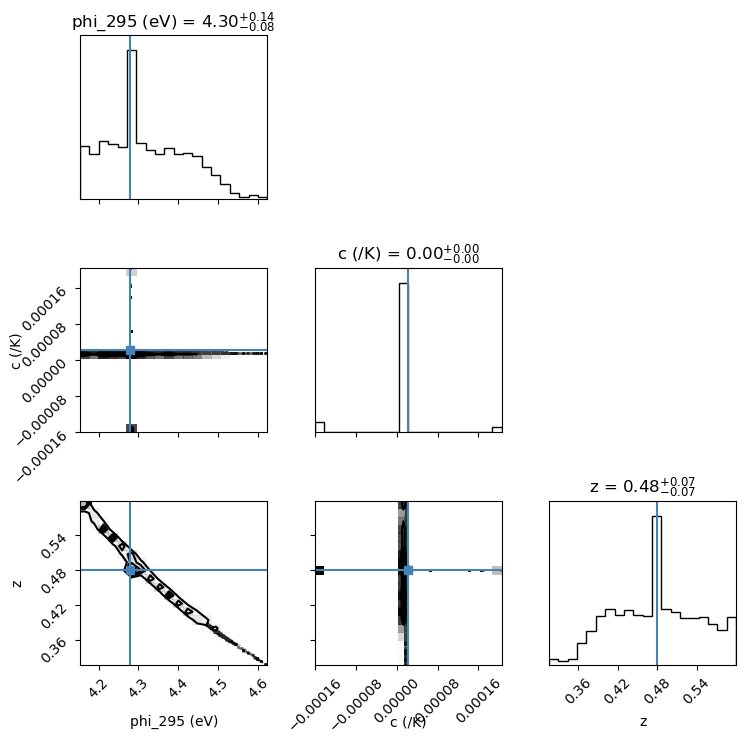

Best-fit parameters (median):
phi_295 = 4.2970 eV
c = 1.74e-05 /K
z = 0.4799
t_melt = 933.5 K (fixed)


In [30]:
# (C) Reza Rahemi, modified for MCMC
# Theoretical prediction for Work function as a function of temperature
# Reference: R. Rahemi, Scripta Materialia 99 (2015)
# Uses MCMC to fit model parameters to experimental data for Aluminum (200–600 K), with t_melt constant

import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
import emcee
import corner

def load_experimental_data(filename: str) -> tuple[np.ndarray, np.ndarray]:
    """Load experimental data from a CSV file and filter for 200–600 K."""
    file_path = Path("data") / filename
    try:
        data = np.genfromtxt(file_path, delimiter=",")
        # Assume data has two columns: temperature (K) and Young's Modulus (GPa)
        temperatures = data[:, 0]
        moduli = data[:, 1]
        # Filter data for 200 K to 600 K
        mask = (temperatures >= 200) & (temperatures <= 600)
        filtered_temps = temperatures[mask]
        filtered_moduli = moduli[mask]
        if filtered_temps.size == 0:
            print("Warning: No data points found in the 200–600 K range.")
        return filtered_temps, filtered_moduli
    except FileNotFoundError:
        print(f"Error: File {file_path} not found. Please ensure the file exists in the 'data' directory.")
        return np.array([]), np.array([])
    except Exception as e:
        print(f"Error loading data: {e}")
        return np.array([]), np.array([])

def calculate_work_function(t: np.ndarray, phi_295: float, c: float, z: float, t_melt: float = 933.5) -> np.ndarray:
    """Calculate Young's Modulus for given temperature and parameters, with t_melt fixed."""
    # Universal constants
    e = 1.6e-19  # eV in Joules
    k = 1.38e-23  # Boltzmann constant in J/K
    u = 0.02233  # Guomin Hua's universal constant for metals (GPa/eV^6)

    # Material-specific parameters
    x = c * t_melt  # Maximum distance of two atoms (Thermal Coef * melting temp in micro-meter)

    # Calculate dimensionless term
    y = (7 * k * (t - 295)) / (48 * phi_295 * e)

    # Calculate alpha (summation for n=0 to n=1 as per paper)
    s = sum((x + (n - 1) * 2**0.5)**2 / (1 + (n - 1) * 2**0.5)**2 for n in range(1, 3))
    alpha = (36 / x**2) * s

    # Calculate work function
    w = phi_295 - alpha * (y**2) * phi_295

    # Young's Modulus in GPa
    m = z * u * w**6
    return m

def log_prior(theta: tuple[float, float, float]) -> float:
    """Define prior distributions for parameters."""
    phi_295, c, z = theta
    # Normal prior for phi_295 around 4.28 eV
    if not (3.8 <= phi_295 <= 4.8):
        return -np.inf
    # Uniform prior for c (thermal expansion coefficient)
    if not (15e-6 <= c <= 30e-6):
        return -np.inf
    # Uniform prior for z (beta)
    if not (0.3 <= z <= 0.6):
        return -np.inf
    # Gaussian prior for phi_295
    return -0.5 * ((phi_295 - 4.28) / 0.2)**2

def log_likelihood(theta: tuple[float, float, float], t: np.ndarray, m_data: np.ndarray, sigma: float) -> float:
    """Calculate log-likelihood assuming Gaussian errors."""
    phi_295, c, z = theta
    m_model = calculate_work_function(t, phi_295, c, z)
    return -0.5 * np.sum(((m_data - m_model) / sigma)**2)

def log_posterior(theta: tuple[float, float, float], t: np.ndarray, m_data: np.ndarray, sigma: float) -> float:
    """Calculate log-posterior probability."""
    lp = log_prior(theta)
    if not np.isfinite(lp):
        return -np.inf
    return lp + log_likelihood(theta, t, m_data, sigma)

def run_mcmc(tdata: np.ndarray, mdata: np.ndarray, sigma: float = 1.0):
    """Run MCMC to fit model parameters."""
    # MCMC parameters
    nwalkers = 32
    nsteps = 1000
    ndim = 3  # Number of parameters: phi_295, c, z

    # Initial guesses
    initial = [4.28, 23.1e-6, 0.48]
    pos = initial + 1e-4 * np.random.randn(nwalkers, ndim)

    # Set up sampler
    sampler = emcee.EnsembleSampler(nwalkers, ndim, log_posterior, args=(tdata, mdata, sigma))

    # Run MCMC
    sampler.run_mcmc(pos, nsteps, progress=True)

    # Get samples, discard first 200 steps as burn-in
    samples = sampler.get_chain(discard=200, flat=True)
    return samples

def plot_results(t: np.ndarray, m: np.ndarray, tdata: np.ndarray, mdata: np.ndarray, samples: np.ndarray):
    """Plot experimental data, initial model, best-fit model, and posterior distributions."""
    plt.style.use('default')
    fig = plt.figure(figsize=(12, 5))
    gs = fig.add_gridspec(1, 2, width_ratios=[1, 1])

    # Plot data and model
    ax1 = fig.add_subplot(gs[0])
    ax1.plot(t, m, label='Reza- Theoretical Model', linewidth=2, linestyle='--')
    if tdata.size > 0 and mdata.size > 0:
        ax1.errorbar(tdata, mdata, yerr=1.0, fmt='o', label='Experimental Data (200–600 K)')

    # Plot MCMC best-fit model
    theta_best = np.median(samples, axis=0)  # Median of posterior
    m_best = calculate_work_function(t, *theta_best)
    ax1.plot(t, m_best, label='MCMC Best Fit', linewidth=2)
    
    ax1.set_xlabel('Temperature (K)')
    ax1.set_ylabel("Young's Modulus (GPa)")
    ax1.set_title('Experimental Data vs. Model (200–600 K)')
    ax1.legend()
    ax1.grid(True)

    # Plot posterior distributions
    ax2 = fig.add_subplot(gs[1])
    labels = ['phi_295 (eV)', 'c (/K)', 'z']
    corner.corner(samples, labels=labels, truths=[4.28, 23.1e-6, 0.48], show_titles=True)
    
    plt.tight_layout()
    plt.show()

    # Print best-fit parameters
    theta_best = np.median(samples, axis=0)
    print(f"Best-fit parameters (median):")
    print(f"phi_295 = {theta_best[0]:.4f} eV")
    print(f"c = {theta_best[1]:.2e} /K")
    print(f"z = {theta_best[2]:.4f}")
    print(f"t_melt = 933.5 K (fixed)")

def main():
    # Aluminum parameters (initial guesses)
    phi_295 = 4.28  # Work function at 295K (eV)
    c = 23.1e-6     # Thermal expansion coefficient (/K)
    t_melt = 933.5  # Melting temperature (K, fixed)
    z = 0.48        # Beta value for Aluminum

    # Load experimental data (filtered for 200–600 K)
    tdata, mdata = load_experimental_data("Al.csv")
    if tdata.size == 0:
        print("No valid data loaded. Cannot run MCMC.")
        return

    # Generate temperature array for theoretical model (200–600 K)
    t = np.linspace(200, 600, 100)

    # Calculate initial model (before MCMC)
    m = calculate_work_function(t, phi_295, c, z, t_melt)

    # Run MCMC
    sigma = 1.0  # Assumed error in Young's Modulus (GPa)
    samples = run_mcmc(tdata, mdata, sigma)

    # Plot results
    plot_results(t, m, tdata, mdata, samples)

if __name__ == "__main__":
    main()

  0%|          | 0/1000 [00:00<?, ?it/s]/opt/anaconda3/lib/python3.13/site-packages/emcee/moves/red_blue.py:99: RuntimeWarning: invalid value encountered in scalar subtract
  lnpdiff = f + nlp - state.log_prob[j]
100%|██████████| 1000/1000 [00:00<00:00, 1955.50it/s]


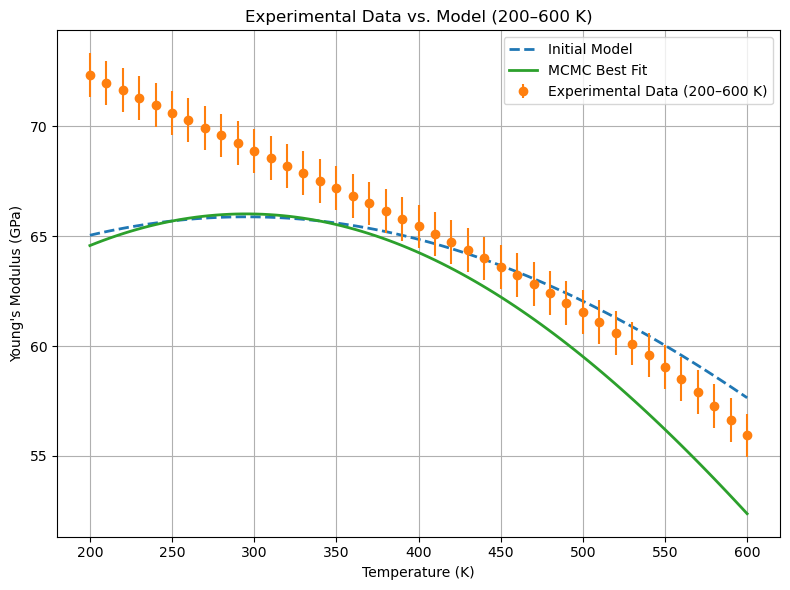

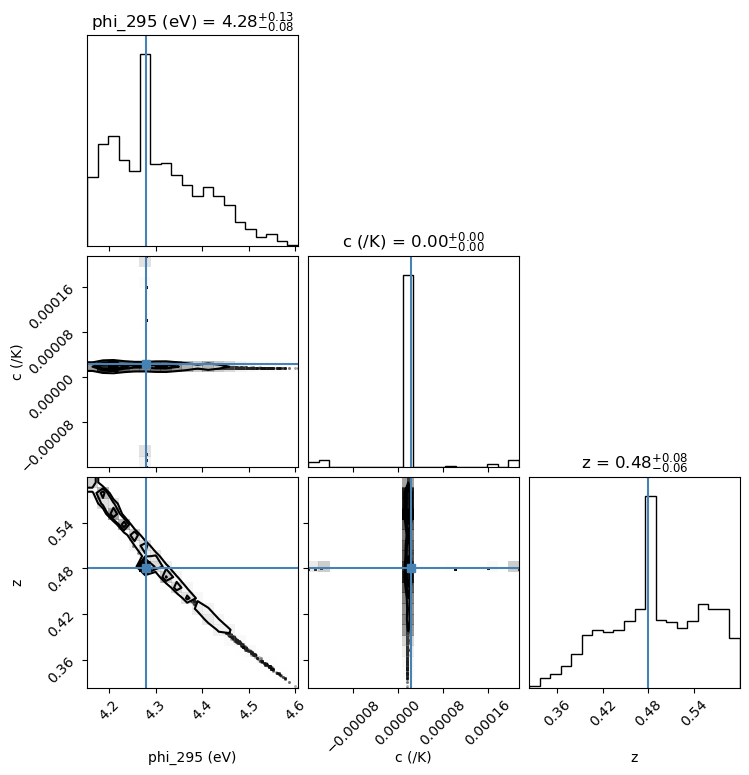

Best-fit parameters (median):
phi_295 = 4.2801 eV
c = 1.75e-05 /K
z = 0.4809
t_melt = 933.5 K (fixed)


In [31]:
# (C) Reza Rahemi, modified for MCMC
# Theoretical prediction for Work function as a function of temperature
# Reference: R. Rahemi, Scripta Materialia 99 (2015)
# Uses MCMC to fit model parameters to experimental data for Aluminum (200–600 K), with t_melt constant

import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
import emcee
import corner

def load_experimental_data(filename: str) -> tuple[np.ndarray, np.ndarray]:
    """Load experimental data from a CSV file and filter for 200–600 K."""
    file_path = Path("data") / filename
    try:
        data = np.genfromtxt(file_path, delimiter=",")
        # Assume data has two columns: temperature (K) and Young's Modulus (GPa)
        temperatures = data[:, 0]
        moduli = data[:, 1]
        # Filter data for 200 K to 600 K
        mask = (temperatures >= 200) & (temperatures <= 600)
        filtered_temps = temperatures[mask]
        filtered_moduli = moduli[mask]
        if filtered_temps.size == 0:
            print("Warning: No data points found in the 200–600 K range.")
        return filtered_temps, filtered_moduli
    except FileNotFoundError:
        print(f"Error: File {file_path} not found. Please ensure the file exists in the 'data' directory.")
        return np.array([]), np.array([])
    except Exception as e:
        print(f"Error loading data: {e}")
        return np.array([]), np.array([])

def calculate_work_function(t: np.ndarray, phi_295: float, c: float, z: float, t_melt: float = 933.5) -> np.ndarray:
    """Calculate Young's Modulus for given temperature and parameters, with t_melt fixed."""
    # Universal constants
    e = 1.6e-19  # eV in Joules
    k = 1.38e-23  # Boltzmann constant in J/K
    u = 0.02233  # Guomin Hua's universal constant for metals (GPa/eV^6)

    # Material-specific parameters
    x = c * t_melt  # Maximum distance of two atoms (Thermal Coef * melting temp in micro-meter)

    # Calculate dimensionless term
    y = (7 * k * (t - 295)) / (48 * phi_295 * e)

    # Calculate alpha (summation for n=0 to n=1 as per paper)
    s = sum((x + (n - 1) * 2**0.5)**2 / (1 + (n - 1) * 2**0.5)**2 for n in range(1, 3))
    alpha = (36 / x**2) * s

    # Calculate work function
    w = phi_295 - alpha * (y**2) * phi_295

    # Young's Modulus in GPa
    m = z * u * w**6
    return m

def log_prior(theta: tuple[float, float, float]) -> float:
    """Define prior distributions for parameters."""
    phi_295, c, z = theta
    # Normal prior for phi_295 around 4.28 eV
    if not (3.8 <= phi_295 <= 4.8):
        return -np.inf
    # Uniform prior for c (thermal expansion coefficient)
    if not (15e-6 <= c <= 30e-6):
        return -np.inf
    # Uniform prior for z (beta)
    if not (0.3 <= z <= 0.6):
        return -np.inf
    # Gaussian prior for phi_295
    return -0.5 * ((phi_295 - 4.28) / 0.2)**2

def log_likelihood(theta: tuple[float, float, float], t: np.ndarray, m_data: np.ndarray, sigma: float) -> float:
    """Calculate log-likelihood assuming Gaussian errors."""
    phi_295, c, z = theta
    m_model = calculate_work_function(t, phi_295, c, z)
    return -0.5 * np.sum(((m_data - m_model) / sigma)**2)

def log_posterior(theta: tuple[float, float, float], t: np.ndarray, m_data: np.ndarray, sigma: float) -> float:
    """Calculate log-posterior probability."""
    lp = log_prior(theta)
    if not np.isfinite(lp):
        return -np.inf
    return lp + log_likelihood(theta, t, m_data, sigma)

def run_mcmc(tdata: np.ndarray, mdata: np.ndarray, sigma: float = 1.0):
    """Run MCMC to fit model parameters."""
    # MCMC parameters
    nwalkers = 32
    nsteps = 1000
    ndim = 3  # Number of parameters: phi_295, c, z

    # Initial guesses
    initial = [4.28, 23.1e-6, 0.48]
    pos = initial + 1e-4 * np.random.randn(nwalkers, ndim)

    # Set up sampler
    sampler = emcee.EnsembleSampler(nwalkers, ndim, log_posterior, args=(tdata, mdata, sigma))

    # Run MCMC
    sampler.run_mcmc(pos, nsteps, progress=True)

    # Get samples, discard first 200 steps as burn-in
    samples = sampler.get_chain(discard=200, flat=True)
    return samples

def plot_results(t: np.ndarray, m: np.ndarray, tdata: np.ndarray, mdata: np.ndarray, samples: np.ndarray):
    """Plot experimental data, initial model, best-fit model, and posterior distributions."""
    # Plot 1: Data and model
    fig1 = plt.figure(figsize=(8, 6))
    ax1 = fig1.add_subplot(111)
    ax1.plot(t, m, label='Initial Model', linewidth=2, linestyle='--')
    if tdata.size > 0 and mdata.size > 0:
        ax1.errorbar(tdata, mdata, yerr=1.0, fmt='o', label='Experimental Data (200–600 K)')

    # Plot MCMC best-fit model
    theta_best = np.median(samples, axis=0)  # Median of posterior
    m_best = calculate_work_function(t, *theta_best)
    ax1.plot(t, m_best, label='MCMC Best Fit', linewidth=2)
    
    ax1.set_xlabel('Temperature (K)')
    ax1.set_ylabel("Young's Modulus (GPa)")
    ax1.set_title('Experimental Data vs. Model (200–600 K)')
    ax1.legend()
    ax1.grid(True)
    plt.tight_layout()

    # Plot 2: Corner plot in a separate figure
    fig2 = plt.figure(figsize=(8, 8))
    labels = ['phi_295 (eV)', 'c (/K)', 'z']
    corner.corner(samples, labels=labels, truths=[4.28, 23.1e-6, 0.48], fig=fig2, show_titles=True)
    
    plt.show()

    # Print best-fit parameters
    theta_best = np.median(samples, axis=0)
    print(f"Best-fit parameters (median):")
    print(f"phi_295 = {theta_best[0]:.4f} eV")
    print(f"c = {theta_best[1]:.2e} /K")
    print(f"z = {theta_best[2]:.4f}")
    print(f"t_melt = 933.5 K (fixed)")

def main():
    # Aluminum parameters (initial guesses)
    phi_295 = 4.28  # Work function at 295K (eV)
    c = 23.1e-6     # Thermal expansion coefficient (/K)
    t_melt = 933.5  # Melting temperature (K, fixed)
    z = 0.48        # Beta value for Aluminum

    # Load experimental data (filtered for 200–600 K)
    tdata, mdata = load_experimental_data("Al.csv")
    if tdata.size == 0:
        print("No valid data loaded. Cannot run MCMC.")
        return

    # Generate temperature array for theoretical model (200–600 K)
    t = np.linspace(200, 600, 100)

    # Calculate initial model (before MCMC)
    m = calculate_work_function(t, phi_295, c, z, t_melt)

    # Run MCMC
    sigma = 1.0  # Assumed error in Young's Modulus (GPa)
    samples = run_mcmc(tdata, mdata, sigma)

    # Plot results
    plot_results(t, m, tdata, mdata, samples)

if __name__ == "__main__":
    main()

  0%|          | 0/1000 [00:00<?, ?it/s]/opt/anaconda3/lib/python3.13/site-packages/emcee/moves/red_blue.py:99: RuntimeWarning: invalid value encountered in scalar subtract
  lnpdiff = f + nlp - state.log_prob[j]
100%|██████████| 1000/1000 [00:00<00:00, 2281.20it/s]


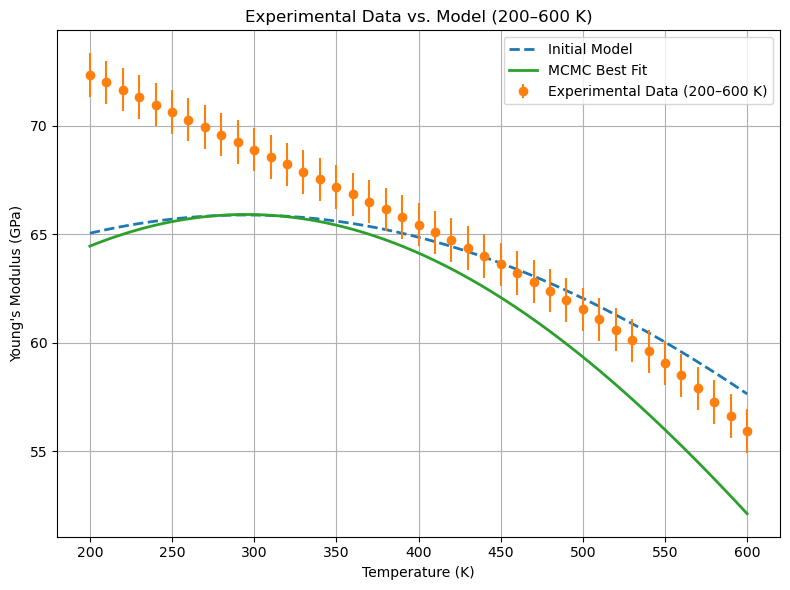

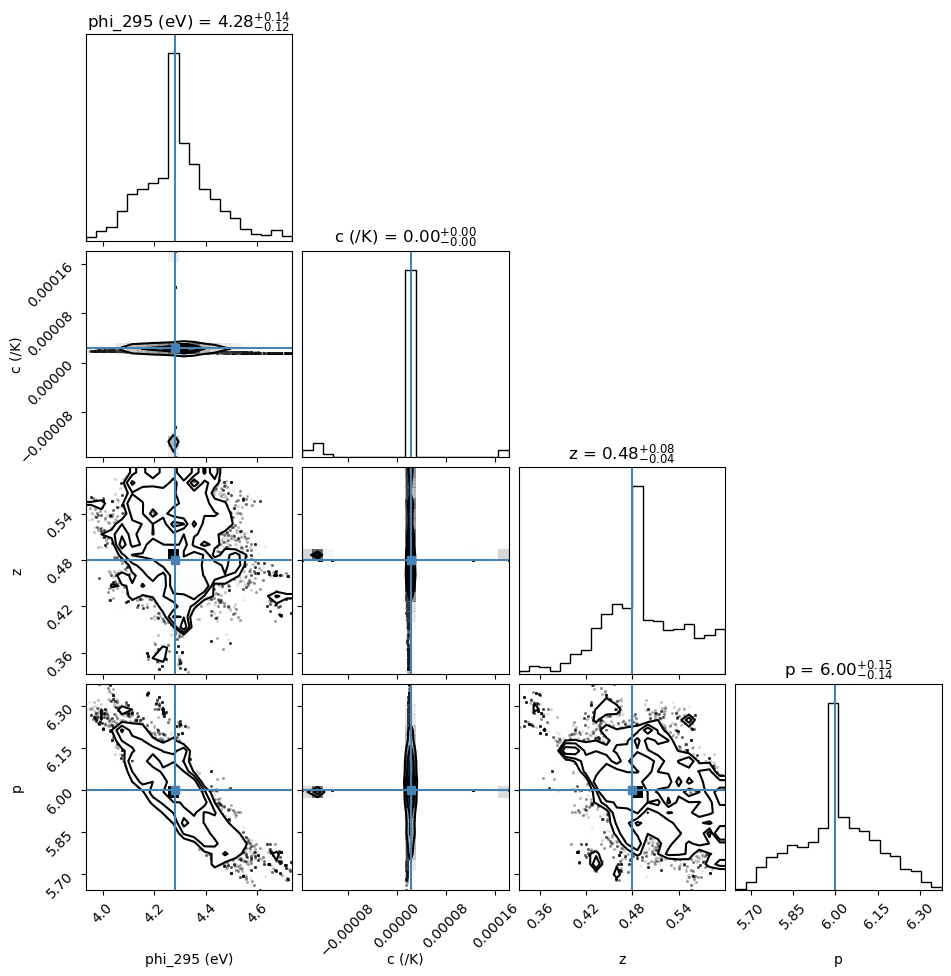

Best-fit parameters (median):
phi_295 = 4.2801 eV
c = 1.74e-05 /K
z = 0.4801
p = 6.0000
t_melt = 933.5 K (fixed)


In [32]:
# (C) Reza Rahemi, modified for MCMC
# Theoretical prediction for Work function as a function of temperature
# Reference: R. Rahemi, Scripta Materialia 99 (2015)
# Uses MCMC to fit model parameters (including exponent p) to experimental data for Aluminum (200–600 K), with t_melt constant

import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
import emcee
import corner

def load_experimental_data(filename: str) -> tuple[np.ndarray, np.ndarray]:
    """Load experimental data from a CSV file and filter for 200–600 K."""
    file_path = Path("data") / filename
    try:
        data = np.genfromtxt(file_path, delimiter=",")
        # Assume data has two columns: temperature (K) and Young's Modulus (GPa)
        temperatures = data[:, 0]
        moduli = data[:, 1]
        # Filter data for 200 K to 600 K
        mask = (temperatures >= 200) & (temperatures <= 600)
        filtered_temps = temperatures[mask]
        filtered_moduli = moduli[mask]
        if filtered_temps.size == 0:
            print("Warning: No data points found in the 200–600 K range.")
        return filtered_temps, filtered_moduli
    except FileNotFoundError:
        print(f"Error: File {file_path} not found. Please ensure the file exists in the 'data' directory.")
        return np.array([]), np.array([])
    except Exception as e:
        print(f"Error loading data: {e}")
        return np.array([]), np.array([])

def calculate_work_function(t: np.ndarray, phi_295: float, c: float, z: float, p: float, t_melt: float = 933.5) -> np.ndarray:
    """Calculate Young's Modulus for given temperature and parameters, with t_melt fixed."""
    # Universal constants
    e = 1.6e-19  # eV in Joules
    k = 1.38e-23  # Boltzmann constant in J/K
    u = 0.02233  # Guomin Hua's universal constant for metals (GPa/eV^6)

    # Material-specific parameters
    x = c * t_melt  # Maximum distance of two atoms (Thermal Coef * melting temp in micro-meter)

    # Calculate dimensionless term
    y = (7 * k * (t - 295)) / (48 * phi_295 * e)

    # Calculate alpha (summation for n=0 to n=1 as per paper)
    s = sum((x + (n - 1) * 2**0.5)**2 / (1 + (n - 1) * 2**0.5)**2 for n in range(1, 3))
    alpha = (36 / x**2) * s

    # Calculate work function
    w = phi_295 - alpha * (y**2) * phi_295

    # Young's Modulus in GPa
    m = z * u * w**p
    return m

def log_prior(theta: tuple[float, float, float, float]) -> float:
    """Define prior distributions for parameters."""
    phi_295, c, z, p = theta
    # Normal prior for phi_295 around 4.28 eV
    if not (3.8 <= phi_295 <= 4.8):
        return -np.inf
    # Uniform prior for c (thermal expansion coefficient)
    if not (15e-6 <= c <= 30e-6):
        return -np.inf
    # Uniform prior for z (beta)
    if not (0.3 <= z <= 0.6):
        return -np.inf
    # Uniform prior for p (exponent)
    if not (5.0 <= p <= 7.0):
        return -np.inf
    # Gaussian prior for phi_295
    return -0.5 * ((phi_295 - 4.28) / 0.2)**2

def log_likelihood(theta: tuple[float, float, float, float], t: np.ndarray, m_data: np.ndarray, sigma: float) -> float:
    """Calculate log-likelihood assuming Gaussian errors."""
    phi_295, c, z, p = theta
    m_model = calculate_work_function(t, phi_295, c, z, p)
    return -0.5 * np.sum(((m_data - m_model) / sigma)**2)

def log_posterior(theta: tuple[float, float, float, float], t: np.ndarray, m_data: np.ndarray, sigma: float) -> float:
    """Calculate log-posterior probability."""
    lp = log_prior(theta)
    if not np.isfinite(lp):
        return -np.inf
    return lp + log_likelihood(theta, t, m_data, sigma)

def run_mcmc(tdata: np.ndarray, mdata: np.ndarray, sigma: float = 1.0):
    """Run MCMC to fit model parameters."""
    # MCMC parameters
    nwalkers = 32
    nsteps = 1000
    ndim = 4  # Number of parameters: phi_295, c, z, p

    # Initial guesses
    initial = [4.28, 23.1e-6, 0.48, 6.0]
    pos = initial + 1e-4 * np.random.randn(nwalkers, ndim)

    # Set up sampler
    sampler = emcee.EnsembleSampler(nwalkers, ndim, log_posterior, args=(tdata, mdata, sigma))

    # Run MCMC
    sampler.run_mcmc(pos, nsteps, progress=True)

    # Get samples, discard first 200 steps as burn-in
    samples = sampler.get_chain(discard=200, flat=True)
    return samples

def plot_results(t: np.ndarray, m: np.ndarray, tdata: np.ndarray, mdata: np.ndarray, samples: np.ndarray):
    """Plot experimental data, Reza's Theoreitcal Model, best-fit model, and posterior distributions."""
    # Plot 1: Data and model
    fig1 = plt.figure(figsize=(8, 6))
    ax1 = fig1.add_subplot(111)
    ax1.plot(t, m, label='Initial Model', linewidth=2, linestyle='--')
    if tdata.size > 0 and mdata.size > 0:
        ax1.errorbar(tdata, mdata, yerr=1.0, fmt='o', label='Experimental Data (200–600 K)')

    # Plot MCMC best-fit model
    theta_best = np.median(samples, axis=0)  # Median of posterior
    m_best = calculate_work_function(t, *theta_best)
    ax1.plot(t, m_best, label='MCMC Best Fit', linewidth=2)
    
    ax1.set_xlabel('Temperature (K)')
    ax1.set_ylabel("Young's Modulus (GPa)")
    ax1.set_title('Experimental Data vs. Model (200–600 K)')
    ax1.legend()
    ax1.grid(True)
    plt.tight_layout()

    # Plot 2: Corner plot in a separate figure
    fig2 = plt.figure(figsize=(10, 10))
    labels = ['phi_295 (eV)', 'c (/K)', 'z', 'p']
    corner.corner(samples, labels=labels, truths=[4.28, 23.1e-6, 0.48, 6.0], fig=fig2, show_titles=True)
    
    plt.show()

    # Print best-fit parameters
    theta_best = np.median(samples, axis=0)
    print(f"Best-fit parameters (median):")
    print(f"phi_295 = {theta_best[0]:.4f} eV")
    print(f"c = {theta_best[1]:.2e} /K")
    print(f"z = {theta_best[2]:.4f}")
    print(f"p = {theta_best[3]:.4f}")
    print(f"t_melt = 933.5 K (fixed)")

def main():
    # Aluminum parameters (initial guesses)
    phi_295 = 4.28  # Work function at 295K (eV)
    c = 23.1e-6     # Thermal expansion coefficient (/K)
    t_melt = 933.5  # Melting temperature (K, fixed)
    z = 0.48        # Beta value for Aluminum
    p = 6.0         # Exponent in w**p (initial guess)

    # Load experimental data (filtered for 200–600 K)
    tdata, mdata = load_experimental_data("Al.csv")
    if tdata.size == 0:
        print("No valid data loaded. Cannot run MCMC.")
        return

    # Generate temperature array for theoretical model (200–600 K)
    t = np.linspace(200, 600, 100)

    # Calculate initial model (before MCMC)
    m = calculate_work_function(t, phi_295, c, z, p, t_melt)

    # Run MCMC
    sigma = 1.0  # Assumed error in Young's Modulus (GPa)
    samples = run_mcmc(tdata, mdata, sigma)

    # Plot results
    plot_results(t, m, tdata, mdata, samples)

if __name__ == "__main__":
    main()

/opt/anaconda3/lib/python3.13/site-packages/emcee/moves/red_blue.py:99: RuntimeWarning: invalid value encountered in scalar subtract
  lnpdiff = f + nlp - state.log_prob[j]


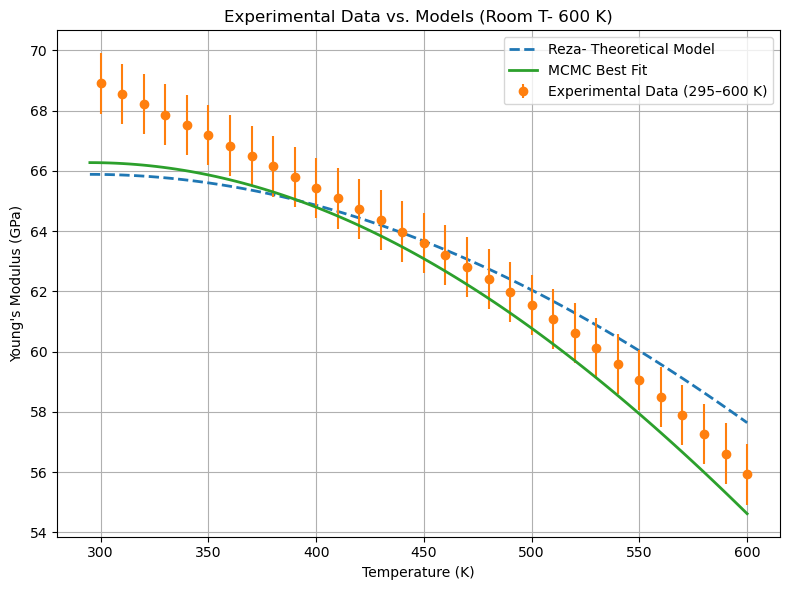

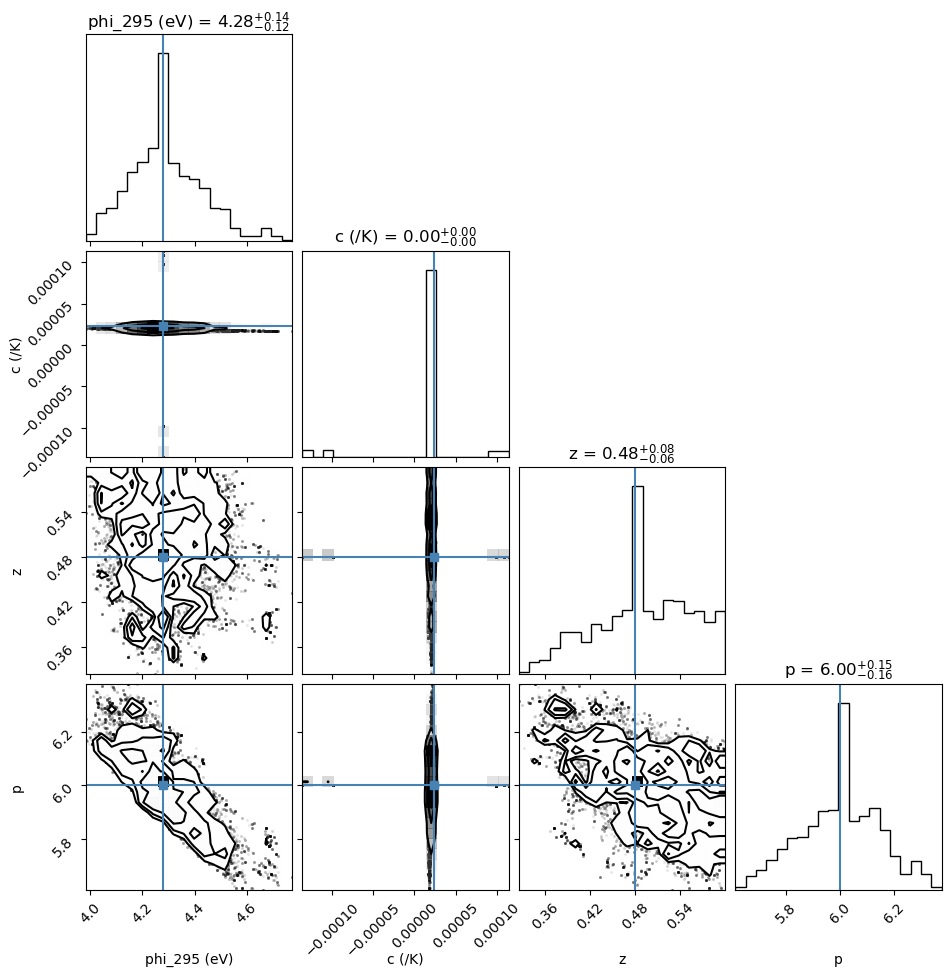

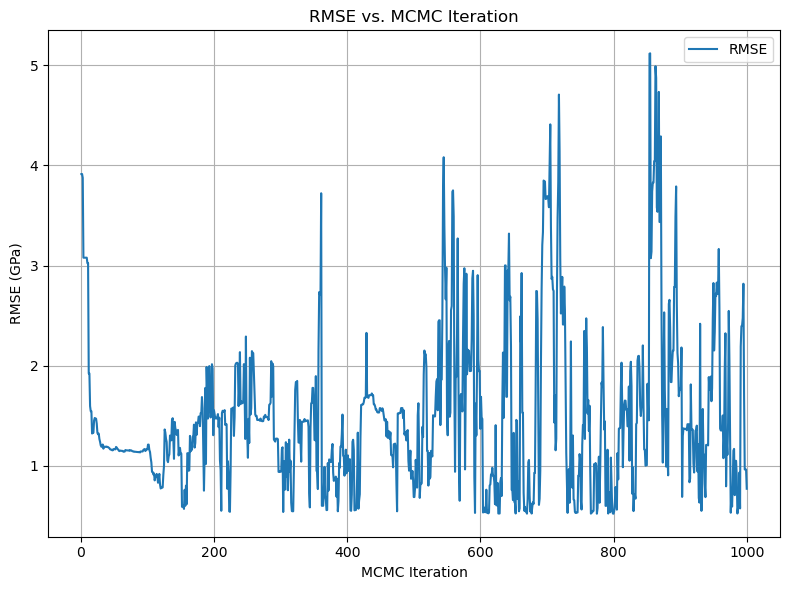

Best-fit parameters (median):
phi_295 = 4.2800 eV
c = 1.92e-05 /K
z = 0.4828
p = 6.0000
t_melt = 933.5 K (fixed)
Final RMSE = 1.1885 GPa


In [42]:
# (C) Reza Rahemi, modified for MCMC and RMSE
# Theoretical prediction for Work function as a function of temperature
# Reference: R. Rahemi, Scripta Materialia 99 (2015)
# Uses MCMC to fit model parameters (including exponent p) to experimental data for Aluminum (200–600 K), with t_melt constant
# Calculates and plots RMSE

import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
import emcee
import corner

def load_experimental_data(filename: str) -> tuple[np.ndarray, np.ndarray]:
    """Load experimental data from a CSV file and filter for 200–600 K."""
    file_path = Path("data") / filename
    try:
        data = np.genfromtxt(file_path, delimiter=",")
        # Assume data has two columns: temperature (K) and Young's Modulus (GPa)
        temperatures = data[:, 0]
        moduli = data[:, 1]
        # Filter data for 200 K to 600 K
        mask = (temperatures >= 295) & (temperatures <= 600)
        filtered_temps = temperatures[mask]
        filtered_moduli = moduli[mask]
        if filtered_temps.size == 0:
            print("Warning: No data points found in the 200–600 K range.")
        return filtered_temps, filtered_moduli
    except FileNotFoundError:
        print(f"Error: File {file_path} not found. Please ensure the file exists in the 'data' directory.")
        return np.array([]), np.array([])
    except Exception as e:
        print(f"Error loading data: {e}")
        return np.array([]), np.array([])

def calculate_work_function(t: np.ndarray, phi_295: float, c: float, z: float, p: float, t_melt: float = 933.5) -> np.ndarray:
    """Calculate Young's Modulus for given temperature and parameters, with t_melt fixed."""
    # Universal constants
    e = 1.6e-19  # eV in Joules
    k = 1.38e-23  # Boltzmann constant in J/K
    u = 0.02233  # Guomin Hua's universal constant for metals (GPa/eV^6)

    # Material-specific parameters
    x = c * t_melt  # Maximum distance of two atoms (Thermal Coef * melting temp in micro-meter)

    # Calculate dimensionless term
    y = (7 * k * (t - 295)) / (48 * phi_295 * e)

    # Calculate alpha (summation for n=0 to n=1 as per paper)
    s = sum((x + (n - 1) * 2**0.5)**2 / (1 + (n - 1) * 2**0.5)**2 for n in range(1, 3))
    alpha = (36 / x**2) * s

    # Calculate work function
    w = phi_295 - alpha * (y**2) * phi_295

    # Young's Modulus in GPa
    m = z * u * w**p
    return m

def calculate_rmse(m_model: np.ndarray, m_data: np.ndarray) -> float:
    """Calculate Root Mean Square Error between model and data."""
    return np.sqrt(np.mean((m_model - m_data)**2))

def log_prior(theta: tuple[float, float, float, float]) -> float:
    """Define prior distributions for parameters."""
    phi_295, c, z, p = theta
    # Normal prior for phi_295 around 4.28 eV
    if not (3.8 <= phi_295 <= 4.8):
        return -np.inf
    # Uniform prior for c (thermal expansion coefficient)
    if not (15e-6 <= c <= 30e-6):
        return -np.inf
    # Uniform prior for z (beta)
    if not (0.3 <= z <= 0.6):
        return -np.inf
    # Uniform prior for p (exponent)
    if not (5.0 <= p <= 7.0):
        return -np.inf
    # Gaussian prior for phi_295
    return -0.5 * ((phi_295 - 4.28) / 0.2)**2

def log_likelihood(theta: tuple[float, float, float, float], t: np.ndarray, m_data: np.ndarray, sigma: float) -> float:
    """Calculate log-likelihood assuming Gaussian errors."""
    phi_295, c, z, p = theta
    m_model = calculate_work_function(t, phi_295, c, z, p)
    return -0.5 * np.sum(((m_data - m_model) / sigma)**2)

def log_posterior(theta: tuple[float, float, float, float], t: np.ndarray, m_data: np.ndarray, sigma: float) -> float:
    """Calculate log-posterior probability."""
    lp = log_prior(theta)
    if not np.isfinite(lp):
        return -np.inf
    return lp + log_likelihood(theta, t, m_data, sigma)

def run_mcmc(tdata: np.ndarray, mdata: np.ndarray, sigma: float = 1.0):
    """Run MCMC to fit model parameters and compute RMSE per iteration."""
    # MCMC parameters
    nwalkers = 32
    nsteps = 1000
    ndim = 4  # Number of parameters: phi_295, c, z, p

    # Initial guesses
    initial = [4.28, 23.1e-6, 0.48, 6.0]
    pos = initial + 1e-4 * np.random.randn(nwalkers, ndim)

    # Set up sampler
    sampler = emcee.EnsembleSampler(nwalkers, ndim, log_posterior, args=(tdata, mdata, sigma))

    # Run MCMC and collect RMSE
    rmse_values = []
    state = pos
    for i in range(nsteps):
        state = sampler.run_mcmc(state, 1, progress=False)
        # Compute RMSE for the median parameters at this step
        samples = sampler.get_chain(flat=True)
        theta_median = np.median(samples[-nwalkers:], axis=0)
        m_model = calculate_work_function(tdata, *theta_median)
        rmse = calculate_rmse(m_model, mdata)
        rmse_values.append(rmse)

    # Get samples, discard first 200 steps as burn-in
    samples = sampler.get_chain(discard=200, flat=True)
    return samples, np.array(rmse_values)

def plot_results(t: np.ndarray, m: np.ndarray, tdata: np.ndarray, mdata: np.ndarray, samples: np.ndarray, rmse_values: np.ndarray):
    """Plot experimental data, Reza's Model, best-fit model, posterior distributions, and RMSE."""
    # Plot 1: Data and model
    fig1 = plt.figure(figsize=(8, 6))
    ax1 = fig1.add_subplot(111)
    ax1.plot(t, m, label='Reza- Theoretical Model', linewidth=2, linestyle='--')
    if tdata.size > 0 and mdata.size > 0:
        ax1.errorbar(tdata, mdata, yerr=1.0, fmt='o', label='Experimental Data (295–600 K)')

    # Plot MCMC best-fit model
    theta_best = np.median(samples, axis=0)  # Median of posterior
    m_best = calculate_work_function(t, *theta_best)
    ax1.plot(t, m_best, label='MCMC Best Fit', linewidth=2)
    
    ax1.set_xlabel('Temperature (K)')
    ax1.set_ylabel("Young's Modulus (GPa)")
    ax1.set_title('Experimental Data vs. Models (Room T- 600 K)')
    ax1.legend()
    ax1.grid(True)
    plt.tight_layout()

    # Plot 2: Corner plot
    fig2 = plt.figure(figsize=(10, 10))
    labels = ['phi_295 (eV)', 'c (/K)', 'z', 'p']
    corner.corner(samples, labels=labels, truths=[4.28, 23.1e-6, 0.48, 6.0], fig=fig2, show_titles=True)

    # Plot 3: RMSE vs. Iteration
    fig3 = plt.figure(figsize=(8, 6))
    ax3 = fig3.add_subplot(111)
    ax3.plot(range(1, len(rmse_values) + 1), rmse_values, label='RMSE')
    ax3.set_xlabel('MCMC Iteration')
    ax3.set_ylabel('RMSE (GPa)')
    ax3.set_title('RMSE vs. MCMC Iteration')
    ax3.legend()
    ax3.grid(True)
    plt.tight_layout()

    plt.show()

    # Print best-fit parameters and final RMSE
    theta_best = np.median(samples, axis=0)
    m_best_data = calculate_work_function(tdata, *theta_best)
    final_rmse = calculate_rmse(m_best_data, mdata)
    print(f"Best-fit parameters (median):")
    print(f"phi_295 = {theta_best[0]:.4f} eV")
    print(f"c = {theta_best[1]:.2e} /K")
    print(f"z = {theta_best[2]:.4f}")
    print(f"p = {theta_best[3]:.4f}")
    print(f"t_melt = 933.5 K (fixed)")
    print(f"Final RMSE = {final_rmse:.4f} GPa")

def main():
    # Aluminum parameters (initial guesses)
    phi_295 = 4.28  # Work function at 295K (eV)
    c = 23.1e-6     # Thermal expansion coefficient (/K)
    t_melt = 933.5  # Melting temperature (K, fixed)
    z = 0.48        # Beta value for Aluminum
    p = 6.0         # Exponent in w**p (initial guess)

    # Load experimental data (filtered for 200–600 K)
    tdata, mdata = load_experimental_data("Al.csv")
    if tdata.size == 0:
        print("No valid data loaded. Cannot run MCMC.")
        return

    # Generate temperature array for theoretical model (200–600 K)
    t = np.linspace(295, 600, 100)

    # Calculate initial model (before MCMC)
    m = calculate_work_function(t, phi_295, c, z, p, t_melt)

    # Run MCMC
    sigma = 1.0  # Assumed error in Young's Modulus (GPa)
    samples, rmse_values = run_mcmc(tdata, mdata, sigma)

    # Plot results
    plot_results(t, m, tdata, mdata, samples, rmse_values)

if __name__ == "__main__":
    main()